In [1]:
import pandas as pd
import numpy as np
from google.colab import files

# **1st dataset: 2021,2022,2023 housing & population data (952 cities)**

In [2]:
uploaded = files.upload()

Saving census_cleaned_nozeros.csv to census_cleaned_nozeros.csv


In [3]:
df = pd.read_csv('census_cleaned_nozeros.csv')
df.head()

,City,State,Merge_Key,State_FIPS,Place_FIPS,NAME,Total_Population_2021,Median_Household_Income_2021,Median_Housing_Value_2021,Owner_Occupied_Units_2021,...,Bachelors_Or_Higher_Rate_2022,Total_Population_2023,Median_Household_Income_2023,Median_Housing_Value_2023,Owner_Occupied_Units_2023,Bachelors_Degree_Count_2023,Masters_Degree_Count_2023,Unemployed_Count_2023,Unemployment_Rate_2023,Bachelors_Or_Higher_Rate_2023
0,Abilene,TX,"abilene,TX",48.0,1000.0,Abilene city,125474.0,54493.0,137800.0,24821.0,...,0.147591,127130.0,62720.0,178900.0,25975.0,13865.0,5723.0,1563.0,0.012295,0.154079
1,Akron,OH,"akron,OH",39.0,1000.0,Akron city,191483.0,42129.0,87100.0,41753.0,...,0.138264,189526.0,48544.0,111200.0,42563.0,19644.0,7326.0,7804.0,0.041176,0.142302
2,Alameda,CA,"alameda,CA",6.0,562.0,Alameda city,78320.0,113339.0,972800.0,14477.0,...,0.381293,76876.0,132015.0,1203900.0,14616.0,19464.0,9653.0,2070.0,0.026926,0.378753
3,Albany,GA,"albany,GA",13.0,1052.0,Albany city,70748.0,40036.0,101200.0,11479.0,...,0.121478,67939.0,45201.0,118700.0,10849.0,4905.0,3093.0,3321.0,0.048882,0.117723
4,Albany,NY,"albany,NY",36.0,1000.0,Albany city,99402.0,52583.0,186500.0,16200.0,...,0.227731,100081.0,59485.0,223000.0,16585.0,15160.0,9255.0,4582.0,0.045783,0.243952


In [4]:
# Identify Cupertino rows
cupertino_mask = (df['City'] == 'Cupertino') & (df['State'] == 'CA')
newport_mask = (df['City'] == 'Newport Beach') & (df['State'] == 'CA')
paloalto_mask = (df['City'] == 'Palo Alto') & (df['State'] == 'CA')

# List the columns for each year
year_cols = [
    'Median_Housing_Value_2021',
    'Median_Housing_Value_2022',
    'Median_Housing_Value_2023'
]

# Replace 2,000,001 with the 95th percentile for each year
for col in year_cols:
    # Compute 95th percentile for that year's column
    p95 = df[col].quantile(0.95)

    # Replace Cupertino's value ONLY if it equals 2,000,001
    df.loc[cupertino_mask & (df[col] == 2000001), col] = p95
    df.loc[newport_mask & (df[col] == 2000001), col] = p95
    df.loc[paloalto_mask & (df[col] == 2000001), col] = p95

In [5]:
for col in df.select_dtypes(include='number').columns:
    print(f"\n=== {col} ===")

    # Row with minimum value
    min_row = df.loc[df[col].idxmin()]
    print(f"Min: {min_row[col]}  |  City: {min_row['City']} ({min_row['State']})")

    # Row with maximum value
    max_row = df.loc[df[col].idxmax()]
    print(f"Max: {max_row[col]}  |  City: {max_row['City']} ({max_row['State']})")



=== State_FIPS ===
Min: 1.0  |  City: Auburn (AL)
Max: 56.0  |  City: Casper (WY)

=== Place_FIPS ===
Min: 562.0  |  City: Alameda (CA)
Max: 89140.0  |  City: Ypsilanti (MI)

=== Total_Population_2021 ===
Min: 1868.0  |  City: Mountain View (CA)
Max: 8736047.0  |  City: New York (NY)

=== Median_Household_Income_2021 ===
Min: 28744.0  |  City: West Lafayette (IN)
Max: 199778.0  |  City: Cupertino (CA)

=== Median_Housing_Value_2021 ===
Min: 35000.0  |  City: Flint (MI)
Max: 1613300.0  |  City: Mountain View (CA)

=== Owner_Occupied_Units_2021 ===
Min: 417.0  |  City: Mountain View (CA)
Max: 1077796.0  |  City: New York (NY)

=== Bachelors_Degree_Count_2021 ===
Min: 365.0  |  City: Mountain View (CA)
Max: 1417437.0  |  City: New York (NY)

=== Masters_Degree_Count_2021 ===
Min: 64.0  |  City: Mountain View (CA)
Max: 731176.0  |  City: New York (NY)

=== Unemployed_Count_2021 ===
Min: 10.0  |  City: Mountain View (CA)
Max: 337393.0  |  City: New York (NY)

=== Unemployment_Rate_2021 ===

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   City                           952 non-null    object 
 1   State                          952 non-null    object 
 2   Merge_Key                      952 non-null    object 
 3   State_FIPS                     952 non-null    float64
 4   Place_FIPS                     952 non-null    float64
 5   NAME                           952 non-null    object 
 6   Total_Population_2021          952 non-null    float64
 7   Median_Household_Income_2021   952 non-null    float64
 8   Median_Housing_Value_2021      952 non-null    float64
 9   Owner_Occupied_Units_2021      952 non-null    float64
 10  Bachelors_Degree_Count_2021    952 non-null    float64
 11  Masters_Degree_Count_2021      952 non-null    float64
 12  Unemployed_Count_2021          952 non-null    flo

# **2nd dataset: Restaurant/cafe venues (951 cities)**

In [7]:
uploaded = files.upload()

Saving resaurant_cafe_venue_features.csv to resaurant_cafe_venue_features.csv


In [8]:
df2 = pd.read_csv('resaurant_cafe_venue_features.csv')

In [9]:
df2.describe()

,Unnamed: 0,n_restaurants,n_cuisine,n_cuisine_mexican,n_cuisine_pizza,n_cuisine_american,n_cuisine_japanese,n_cuisine_thai,n_cuisine_sushi,n_cuisine_italian,...,n_cafe_cuisine_breakfast,n_cafe_cuisine_american,n_cafe_cuisine_coffee,n_cafe_cuisine_pastry,n_cafe_cuisine_tea,n_cafe_cuisine_dessert,n_cafe_cuisine_bagel,n_cafe_cuisine_ice_cream,n_cafe_brand_Tim_Hortons,n_cafe_brand_Dutch_Bros._Coffee
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,...,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,475.000000,165.757098,31.608833,13.522608,14.851735,15.360673,5.328076,4.037855,4.459516,7.667718,...,0.908517,0.427971,0.496320,0.360673,0.574132,0.328076,0.400631,0.426919,0.711882,0.569926
std,274.674353,376.691951,24.846190,27.856876,29.464735,24.238362,20.580462,13.894665,14.015487,26.460000,...,6.540485,1.600268,1.831231,2.980161,1.744925,1.410353,3.507640,1.681062,4.648379,1.536606
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,237.500000,36.000000,16.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.000000,73.000000,25.000000,7.000000,7.000000,8.000000,2.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,712.500000,158.500000,40.000000,14.000000,16.000000,17.000000,5.000000,4.000000,4.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,7580.000000,292.000000,498.000000,642.000000,388.000000,451.000000,258.000000,297.000000,627.000000,...,183.000000,32.000000,32.000000,83.000000,22.000000,20.000000,95.000000,33.000000,79.000000,15.000000


In [10]:
df2 = df2.rename(columns={
    'city': 'Merge_Key',
    'city_name': 'City',
    'state_code': 'State'
})

df2.head()

,Unnamed: 0,Merge_Key,City,State,n_restaurants,n_cuisine,n_cuisine_mexican,n_cuisine_pizza,n_cuisine_american,n_cuisine_japanese,...,n_cafe_cuisine_breakfast,n_cafe_cuisine_american,n_cafe_cuisine_coffee,n_cafe_cuisine_pastry,n_cafe_cuisine_tea,n_cafe_cuisine_dessert,n_cafe_cuisine_bagel,n_cafe_cuisine_ice_cream,n_cafe_brand_Tim_Hortons,n_cafe_brand_Dutch_Bros._Coffee
0,0,"New York, NY",New York,NY,7580,292.0,498.0,642.0,388.0,451.0,...,183.0,32.0,24.0,83.0,17.0,20.0,95.0,33.0,8.0,0.0
1,1,"Los Angeles, CA",Los Angeles,CA,2709,163.0,278.0,164.0,160.0,134.0,...,19.0,13.0,13.0,11.0,10.0,9.0,8.0,3.0,0.0,0.0
2,2,"Chicago, IL",Chicago,IL,2316,154.0,293.0,211.0,207.0,64.0,...,9.0,8.0,8.0,4.0,8.0,4.0,0.0,2.0,0.0,0.0
3,3,"Houston, TX",Houston,TX,1489,111.0,167.0,108.0,128.0,32.0,...,2.0,4.0,2.0,3.0,5.0,3.0,1.0,5.0,2.0,1.0
4,4,"Phoenix, AZ",Phoenix,AZ,867,74.0,157.0,94.0,102.0,17.0,...,8.0,4.0,2.0,1.0,3.0,0.0,1.0,1.0,0.0,8.0


In [11]:
merged_df = df.merge(df2, on=['City', 'State'], how='inner')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Columns: 140 entries, City to n_cafe_brand_Dutch_Bros._Coffee
dtypes: float64(129), int64(6), object(5)
memory usage: 1018.4+ KB


# **3rd Dataset: POI data (995 cities)**

In [12]:
uploaded = files.upload()

Saving all_cultural_pois.csv to all_cultural_pois.csv


In [13]:
df3 = pd.read_csv('all_cultural_pois.csv')
df3['city'].nunique()

911

In [14]:
df3 = df3.rename(columns={
    'city': 'City',
    'state': 'State'
})

In [15]:
import json

df3["tags"] = df3["tags"].apply(json.loads)
df3["amenity"] = df3["tags"].apply(lambda d: d.get("amenity"))
df3["leisure"] = df3["tags"].apply(lambda d: d.get("leisure"))
df3["historic"] = df3["tags"].apply(lambda d: d.get("historic"))

def classify_poi(row):
    if row["amenity"]:
        return f"amenity_{row['amenity']}"
    if row["leisure"]:
        return f"leisure_{row['leisure']}"
    if row["historic"]:
        return "historic_site"
    return "other"

df3["poi_category"] = df3.apply(classify_poi, axis=1)
city_summary = (
    df3.groupby(["City", "State", "poi_category"])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)


In [16]:
merged_df = merged_df.merge(city_summary, on=['City', 'State'], how='inner')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Columns: 194 entries, City to other
dtypes: float64(129), int64(60), object(5)
memory usage: 1.4+ MB


# **4th Dataset: Business Data (___ Cities)**

In [17]:
uploaded = files.upload()

Saving business_data.csv to business_data.csv


In [18]:
df4 = pd.read_csv('business_data.csv')
df4.head()

,city,state,type
0,boise,ID,fortune
1,boise,ID,fortune
2,burlington,NC,fortune
3,fremont,CA,fortune
4,fremont,CA,fortune


In [19]:
df_city = (
    df4.groupby(["city", "state", "type"])
        .size()
        .unstack(fill_value=0)
        .reset_index()
)
df_city.describe()

type,fortune,sbs
count,963.000000,963.000000
mean,0.381101,28.356179
std,1.840618,60.211381
min,0.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,11.000000
75%,0.000000,25.000000
max,45.000000,645.000000


In [20]:
df_city = df_city.rename(columns={
    'city': 'City',
    'state': 'State'
})

In [21]:
df_city["City"] = df_city["City"].str.title()
df_city.head()

type,City,State,fortune,sbs
0,Abilene,TX,0,11
1,Akron,OH,2,21
2,Alameda,CA,0,6
3,Albany,GA,0,12
4,Albany,NY,0,21


In [22]:
merged_df = merged_df.merge(df_city, on=['City', 'State'], how='inner')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Columns: 196 entries, City to sbs
dtypes: float64(129), int64(62), object(5)
memory usage: 1.4+ MB


In [23]:
#merged_df.to_csv("final_cleaned_data.csv", index=False)

# **EDA**

In [25]:
# EDA script for your merged city dataset
# Save as eda.py or paste in a notebook cell and run.

import os
import re
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# ---------- CONFIG ----------
DATA_PATH = "final_cleaned_data.csv"   # change if needed
OUT_DIR = "eda_output"
TOP_K = 20  # how many top cities to show in bar charts
# ----------------------------

os.makedirs(OUT_DIR, exist_ok=True)
plt.rcParams.update({"figure.dpi": 150})

# ---------- LOAD ----------
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH)
print("Shape:", df.shape)
print()

# Normalize column names to be safe (but keep original accessible)
orig_cols = df.columns.tolist()
df.columns = [c.strip() for c in df.columns]  # trim whitespace

# Try to find city/state columns (case-insensitive)
def find_column_by_candidates(df, candidates):
    cols = df.columns
    low = [c.lower() for c in cols]
    for cand in candidates:
        if isinstance(cand, (list, tuple)):
            for option in cand:
                if option.lower() in low:
                    return cols[low.index(option.lower())]
        else:
            if cand.lower() in low:
                return cols[low.index(cand.lower())]
    return None

city_col = find_column_by_candidates(df, ["city", "City", "CityName", "NAME"])
state_col = find_column_by_candidates(df, ["state", "State", "state_code", "ST"])

if not city_col or not state_col:
    print("WARNING: Could not confidently find city/state columns automatically.")
    print("Found columns (first 20):", df.columns[:20].tolist())
    # still continue; user can set manually
else:
    print("Using city column:", city_col, ", state column:", state_col)

# ---------- SIMPLE OVERVIEW ----------
overview = {
    "n_rows": df.shape[0],
    "n_cols": df.shape[1],
    "n_city_unique": df[[city_col, state_col]].drop_duplicates().shape[0] if city_col and state_col else None,
    "columns": df.columns.tolist(),
    "dtypes": df.dtypes.apply(lambda s: s.name).to_dict(),
}

print("\nOverview:")
for k, v in overview.items():
    print(k, ":", v if k != "columns" else f"{len(v)} columns")

# ---------- MISSINGNESS ----------
missing = df.isna().sum().sort_values(ascending=False)
missing.to_csv(os.path.join(OUT_DIR, "missing_values_per_column.csv"))
print("\nTop missing columns:")
print(missing.head(20))

# Missingness heatmap (compressed)
plt.figure(figsize=(10, 4))
plt.imshow(df.isna().T, aspect="auto", interpolation="nearest")
plt.yticks(range(min(30, df.shape[1])), df.columns[:min(30, df.shape[1])], fontsize=8)
plt.xlabel("row index")
plt.title("Missingness (first 30 cols shown on y-axis)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "missingness_heatmap.png"))
plt.close()

# ---------- SEPARATE COLUMN GROUPS (heuristics) ----------
cols = list(df.columns)

# try to identify population/education/housing columns by year or keywords
pop_keywords = ["population", "pop", "household", "median_household_income", "median_housing", "housing", "median"]
restaurant_keywords = ["restaurant", "cafe", "bar", "food", "venue", "eatery"]
poi_keywords = ["amenity", "leisure", "historic", "poi", "museum", "park", "playground", "gallery", "arts"]
business_keywords = ["fortune", "sbs", "business", "companies"]

def find_by_keywords(columns, keywords):
    matches = []
    for c in columns:
        low = c.lower()
        if any(k in low for k in keywords):
            matches.append(c)
    return matches

population_cols = find_by_keywords(cols, pop_keywords)
restaurant_cols = find_by_keywords(cols, restaurant_keywords)
poi_cols = find_by_keywords(cols, poi_keywords)
business_cols = find_by_keywords(cols, business_keywords)

# Fallback to splitting by rough column index ranges if the heuristics fail
if not population_cols and df.shape[1] >= 30:
    population_cols = cols[:30]
if not restaurant_cols and df.shape[1] >= 130:
    restaurant_cols = cols[30:130]
if not poi_cols and df.shape[1] >= 180:
    poi_cols = cols[130:180]
if not business_cols:
    # look for exactly the two business columns 'fortune' and 'sbs'
    for b in ["fortune", "sbs"]:
        if b in [c.lower() for c in cols]:
            business_cols.append([c for c in cols if c.lower()==b][0])

# Deduplicate lists
population_cols = list(dict.fromkeys(population_cols))
restaurant_cols = list(dict.fromkeys(restaurant_cols))
poi_cols = list(dict.fromkeys(poi_cols))
business_cols = list(dict.fromkeys(business_cols))

print("\nDetected column groups:")
print("population_cols (n={}): {}".format(len(population_cols), population_cols[:8]))
print("restaurant_cols (n={}): {}".format(len(restaurant_cols), restaurant_cols[:8]))
print("poi_cols (n={}): {}".format(len(poi_cols), poi_cols[:8]))
print("business_cols (n={}): {}".format(len(business_cols), business_cols[:8]))

# ---------- NUMERIC / CATEGORICAL DIVIDE ----------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Also treat columns that look numeric but are object as numeric candidates
for c in df.columns:
    if c not in numeric_cols:
        # try to coerce to numeric and check how many non-nulls we'd get
        coerced = pd.to_numeric(df[c].dropna().sample(min(200, max(1, int(len(df[c].dropna()))))), errors="coerce")
        if coerced.notna().mean() > 0.95:
            numeric_cols.append(c)

numeric_cols = list(dict.fromkeys(numeric_cols))
categorical_cols = [c for c in df.columns if c not in numeric_cols]
print("\nNumeric columns detected:", len(numeric_cols))
print("Categorical columns detected:", len(categorical_cols))

# Save basic numeric summary
num_summary = df[numeric_cols].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
num_summary.to_csv(os.path.join(OUT_DIR, "numeric_describe.csv"))
print("\nNumeric summary saved to numeric_describe.csv")

# ---------- DISTRIBUTIONS (histograms) ----------
hist_dir = os.path.join(OUT_DIR, "histograms")
os.makedirs(hist_dir, exist_ok=True)

# Save helper to sanitize filenames
def sanitize_filename(s):
    return re.sub(r"[^\w\-_\. ]", "_", s)[:200]

# Plot histograms for first N numeric columns to avoid too many files
N_HIST = min(60, len(numeric_cols))
for c in numeric_cols[:N_HIST]:
    plt.figure(figsize=(5, 3))
    series = pd.to_numeric(df[c], errors="coerce")
    series.dropna(inplace=True)
    if series.empty:
        continue
    plt.hist(series, bins=40)
    plt.title(f"Histogram: {c}\n (n={series.shape[0]})")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.tight_layout()
    fpath = os.path.join(hist_dir, f"hist_{sanitize_filename(c)}.png")
    plt.savefig(fpath)
    plt.close()

print(f"\nSaved up to {N_HIST} histograms in {hist_dir}")

# ---------- BOXPLOTS (for skew/outliers) ----------
box_dir = os.path.join(OUT_DIR, "boxplots")
os.makedirs(box_dir, exist_ok=True)
for c in numeric_cols[:40]:    # limit number of boxplots
    plt.figure(figsize=(5, 2.5))
    series = pd.to_numeric(df[c], errors="coerce").dropna()
    if series.empty:
        continue
    plt.boxplot(series, vert=False)
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.savefig(os.path.join(box_dir, f"box_{sanitize_filename(c)}.png"))
    plt.close()
print(f"Saved up to {min(40, len(numeric_cols))} boxplots in {box_dir}")

# ---------- CORRELATION ANALYSIS ----------
corr_numeric = df[numeric_cols].corr(method="pearson")
corr_numeric.to_csv(os.path.join(OUT_DIR, "correlation_matrix.csv"))

# Correlation heatmap (large, so downsample labels if too many)
plt.figure(figsize=(10, 10))
im = plt.imshow(corr_numeric.values, aspect="auto", vmin=-1, vmax=1, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
# label only up to 40 ticks
maxlabels = 40
labels = corr_numeric.columns.tolist()
step = max(1, len(labels)//maxlabels)
plt.xticks(range(0, len(labels), step), labels[::step], rotation=90, fontsize=7)
plt.yticks(range(0, len(labels), step), labels[::step], fontsize=7)
plt.title("Correlation matrix (numeric columns)")
plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "correlation_heatmap.png"))
plt.close()
print("Saved correlation heatmap.")

# ---------- TOP-K CITY SUMMARIES ----------
if city_col and state_col:
    id_cols = [city_col, state_col]
else:
    # fallback to first two columns
    id_cols = df.columns[:2].tolist()

# Example: top cities by total POIs (if we detect POI count columns)
def sum_over_group(cols_list, label):
    cols2 = [c for c in cols_list if c in df.columns]
    if not cols2:
        return None
    s = df[id_cols + cols2].groupby(id_cols).sum()
    s["total"] = s.sum(axis=1)
    s = s.sort_values("total", ascending=False)
    return s

poi_sum = sum_over_group(poi_cols, "poi")
if poi_sum is not None:
    poi_sum.reset_index().head(TOP_K).to_csv(os.path.join(OUT_DIR, "top_cities_by_poi_counts.csv"))
    # bar chart of top-k
    top = poi_sum.reset_index().head(TOP_K)
    labels = top[city_col] + ", " + top[state_col]
    plt.figure(figsize=(8, 4))
    plt.barh(range(len(top)), top["total"].values)
    plt.yticks(range(len(top)), labels)
    plt.gca().invert_yaxis()
    plt.title(f"Top {TOP_K} cities by POI total")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, "top_cities_by_poi_total.png"))
    plt.close()
    print("Saved POI top-k.")

rest_sum = sum_over_group(restaurant_cols, "restaurant")
if rest_sum is not None:
    rest_sum.reset_index().head(TOP_K).to_csv(os.path.join(OUT_DIR, "top_cities_by_rest_counts.csv"))
    print("Saved restaurant top-k.")

biz_sum = sum_over_group(business_cols, "business")
if biz_sum is not None:
    biz_sum.reset_index().head(TOP_K).to_csv(os.path.join(OUT_DIR, "top_cities_by_business_counts.csv"))
    print("Saved business top-k.")

# ---------- PER-CAPITA RATES ----------
# Try to identify a good population column
pop_col_candidates = [c for c in population_cols if "pop" in c.lower() or "population" in c.lower()]
pop_col = pop_col_candidates[0] if pop_col_candidates else (population_cols[0] if population_cols else None)
if pop_col:
    print("Using population column:", pop_col)
    # Calculate restaurants per 10k people if restaurant counts detected
    if rest_sum is not None:
        rest_df = rest_sum.reset_index()
        # ensure pop exists as numeric (try to merge/populate)
        pop_df = df[id_cols + [pop_col]].groupby(id_cols).first().reset_index()
        merged_rest = rest_df.merge(pop_df, on=id_cols, how="left")
        merged_rest[pop_col] = pd.to_numeric(merged_rest[pop_col], errors="coerce")
        merged_rest["restaurants_per_10k"] = merged_rest["total"] / merged_rest[pop_col] * 10000
        merged_rest.sort_values("restaurants_per_10k", ascending=False).head(TOP_K).to_csv(os.path.join(OUT_DIR, "top_cities_rest_per_10k.csv"))
        print("Saved restaurants per-capita top-k.")
    # POIs per 10k
    if poi_sum is not None:
        poi_df = poi_sum.reset_index()
        pop_df = df[id_cols + [pop_col]].groupby(id_cols).first().reset_index()
        merged_poi = poi_df.merge(pop_df, on=id_cols, how="left")
        merged_poi[pop_col] = pd.to_numeric(merged_poi[pop_col], errors="coerce")
        merged_poi["pois_per_10k"] = merged_poi["total"] / merged_poi[pop_col] * 10000
        merged_poi.sort_values("pois_per_10k", ascending=False).head(TOP_K).to_csv(os.path.join(OUT_DIR, "top_cities_pois_per_10k.csv"))
        print("Saved POIs per-capita top-k.")
else:
    print("No population column detected — skipping per-capita calculations.")

# ---------- OUTLIER DETECTION (IQR) ----------
outlier_info = []
for c in numeric_cols:
    s = pd.to_numeric(df[c], errors="coerce").dropna()
    if s.empty:
        continue
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_out = ((s < lower) | (s > upper)).sum()
    if n_out > 0:
        outlier_info.append({"col": c, "outliers": n_out, "n": s.size, "pct_out": n_out / s.size})

outlier_df = pd.DataFrame(outlier_info).sort_values("pct_out", ascending=False)
outlier_df.to_csv(os.path.join(OUT_DIR, "outlier_summary.csv"), index=False)
print("Saved outlier summary.")

# ---------- PAIRWISE SCATTER MATRIX (a smaller set of columns) ----------
# pick up to 8 numeric columns with largest variance for a scatter matrix
if len(numeric_cols) > 1:
    variances = df[numeric_cols].var().sort_values(ascending=False)
    scatter_cols = variances.index[:8].tolist()
    sm = scatter_matrix(df[scatter_cols].dropna().sample(min(2000, len(df))), alpha=0.4, figsize=(10, 10))
    plt.suptitle("Scatter matrix (sampled)")
    plt.savefig(os.path.join(OUT_DIR, "scatter_matrix.png"))
    plt.close()
    print("Saved scatter matrix.")

# ---------- SAVE A SMALL SUMMARY CSV (one row per city) ----------
if city_col and state_col:
    # numeric aggregation across cities (sum for counts, mean for others)
    agg_funcs = {}
    # sum likely for counts: choose columns that look like counts (restaurant/poi/business)
    for c in restaurant_cols + poi_cols + business_cols:
        if c in df.columns:
            agg_funcs[c] = "sum"
    # for population/continuous variables, keep mean
    for c in population_cols:
        if c in df.columns:
            agg_funcs[c] = "mean"
    # for remaining numeric columns, default to mean
    for c in numeric_cols:
        if c not in agg_funcs:
            agg_funcs[c] = "mean"
    summary_city = df.groupby([city_col, state_col]).agg(agg_funcs).reset_index()
    summary_city.to_csv(os.path.join(OUT_DIR, "city_level_summary.csv"), index=False)
    print("Saved city-level summary CSV.")

# ---------- OPTIONAL: full profiling (ydata-profiling) ----------
# If you'd like a one-file HTML EDA report, install: pip install ydata-profiling
# and uncomment below. The report can be large.
#
# try:
#     from ydata_profiling import ProfileReport
#     profile = ProfileReport(df, title="Full EDA Profile", minimal=True)
#     profile.to_file(os.path.join(OUT_DIR, "full_profile_report.html"))
#     print("Saved full profile report.")
# except Exception as e:
#     print("Profiling not run (module missing or error):", e)

print("\nEDA complete. Outputs in folder:", OUT_DIR)


Loaded: final_cleaned_data.csv
Shape: (911, 196)

Using city column: City , state column: State

Overview:
n_rows : 911
n_cols : 196
n_city_unique : 865
columns : 196 columns
dtypes : {'City': 'object', 'State': 'object', 'Merge_Key_x': 'object', 'State_FIPS': 'float64', 'Place_FIPS': 'float64', 'NAME': 'object', 'Total_Population_2021': 'float64', 'Median_Household_Income_2021': 'float64', 'Median_Housing_Value_2021': 'float64', 'Owner_Occupied_Units_2021': 'float64', 'Bachelors_Degree_Count_2021': 'float64', 'Masters_Degree_Count_2021': 'float64', 'Unemployed_Count_2021': 'float64', 'Unemployment_Rate_2021': 'float64', 'Bachelors_Or_Higher_Rate_2021': 'float64', 'Total_Population_2022': 'float64', 'Median_Household_Income_2022': 'float64', 'Median_Housing_Value_2022': 'float64', 'Owner_Occupied_Units_2022': 'float64', 'Bachelors_Degree_Count_2022': 'float64', 'Masters_Degree_Count_2022': 'float64', 'Unemployed_Count_2022': 'float64', 'Unemployment_Rate_2022': 'float64', 'Bachelors_Or

In [26]:
# Find duplicated city names (keep=False marks *all* duplicates)
laf = merged_df['City'] == 'Lafayette'

# Filter the DataFrame to show only rows with duplicated cities
duplicate_cities_df = merged_df[laf]

print(duplicate_cities_df)


          City State   Merge_Key_x  State_FIPS  Place_FIPS            NAME  \
418  Lafayette    IN  lafayette,IN        18.0     40788.0  Lafayette city   
419  Lafayette    LA  lafayette,LA        22.0     40735.0  Lafayette city   

     Total_Population_2021  Median_Household_Income_2021  \
418                70928.0                       47690.0   
419               122469.0                       55329.0   

     Median_Housing_Value_2021  Owner_Occupied_Units_2021  ...  \
418                   126100.0                    14934.0  ...   
419                   209100.0                    28881.0  ...   

     leisure_bleachers  leisure_garden  leisure_ice_rink  leisure_park  \
418                  0               0                 0            74   
419                  0               0                 0            54   

     leisure_pitch  leisure_sports_centre  leisure_stadium  other  fortune  \
418              0                      0                3     14        0   
419   

In [30]:
state_to_region = {
    # Northeast
    "ME": "Northeast", "NH": "Northeast", "VT": "Northeast", "MA": "Northeast",
    "RI": "Northeast", "CT": "Northeast", "NY": "Northeast", "NJ": "Northeast",
    "PA": "Northeast",

    # Midwest
    "OH": "Midwest", "IN": "Midwest", "IL": "Midwest", "MI": "Midwest",
    "WI": "Midwest", "MN": "Midwest", "IA": "Midwest", "MO": "Midwest",
    "ND": "Midwest", "SD": "Midwest", "NE": "Midwest", "KS": "Midwest",

    # South
    "DE": "South", "MD": "South", "DC": "South", "VA": "South", "WV": "South",
    "NC": "South", "SC": "South", "GA": "South", "FL": "South",
    "KY": "South", "TN": "South", "MS": "South", "AL": "South",
    "OK": "South", "TX": "South", "AR": "South", "LA": "South",

    # West
    "MT": "West", "ID": "West", "WY": "West", "CO": "West", "NM": "West",
    "AZ": "West", "UT": "West", "NV": "West", "WA": "West", "OR": "West",
    "CA": "West", "AK": "West", "HI": "West"
}

merged_df["region"] = merged_df["State"].map(state_to_region).fillna("Other")

merged_df.head()

,City,State,Merge_Key_x,State_FIPS,Place_FIPS,NAME,Total_Population_2021,Median_Household_Income_2021,Median_Housing_Value_2021,Owner_Occupied_Units_2021,...,leisure_garden,leisure_ice_rink,leisure_park,leisure_pitch,leisure_sports_centre,leisure_stadium,other,fortune,sbs,region
0,Abilene,TX,"abilene,TX",48.0,1000.0,Abilene city,125474.0,54493.0,137800.0,24821.0,...,0,0,48,0,0,6,11,0,11,South
1,Akron,OH,"akron,OH",39.0,1000.0,Akron city,191483.0,42129.0,87100.0,41753.0,...,0,0,238,0,0,15,14,2,21,Midwest
2,Alameda,CA,"alameda,CA",6.0,562.0,Alameda city,78320.0,113339.0,972800.0,14477.0,...,0,0,82,0,0,2,11,0,6,West
3,Albany,GA,"albany,GA",13.0,1052.0,Albany city,70748.0,40036.0,101200.0,11479.0,...,0,0,47,0,0,2,1,0,12,South
4,Albany,NY,"albany,NY",36.0,1000.0,Albany city,99402.0,52583.0,186500.0,16200.0,...,0,0,211,0,0,9,22,0,21,Northeast


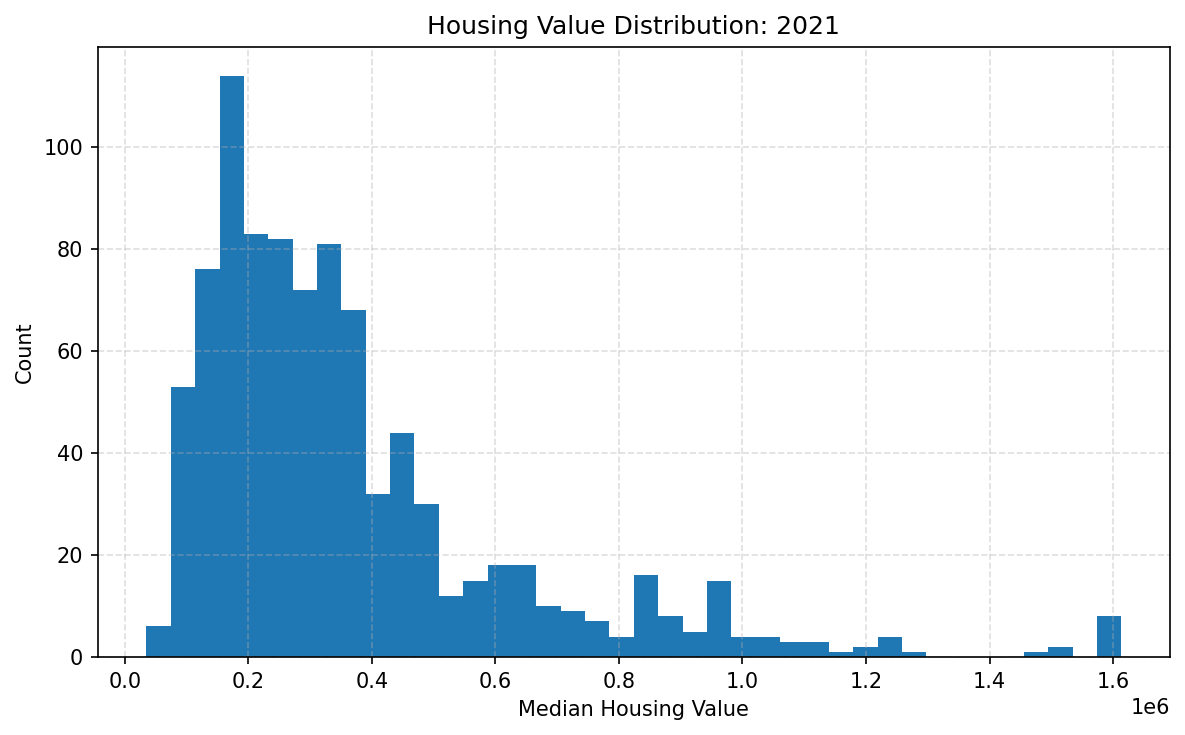

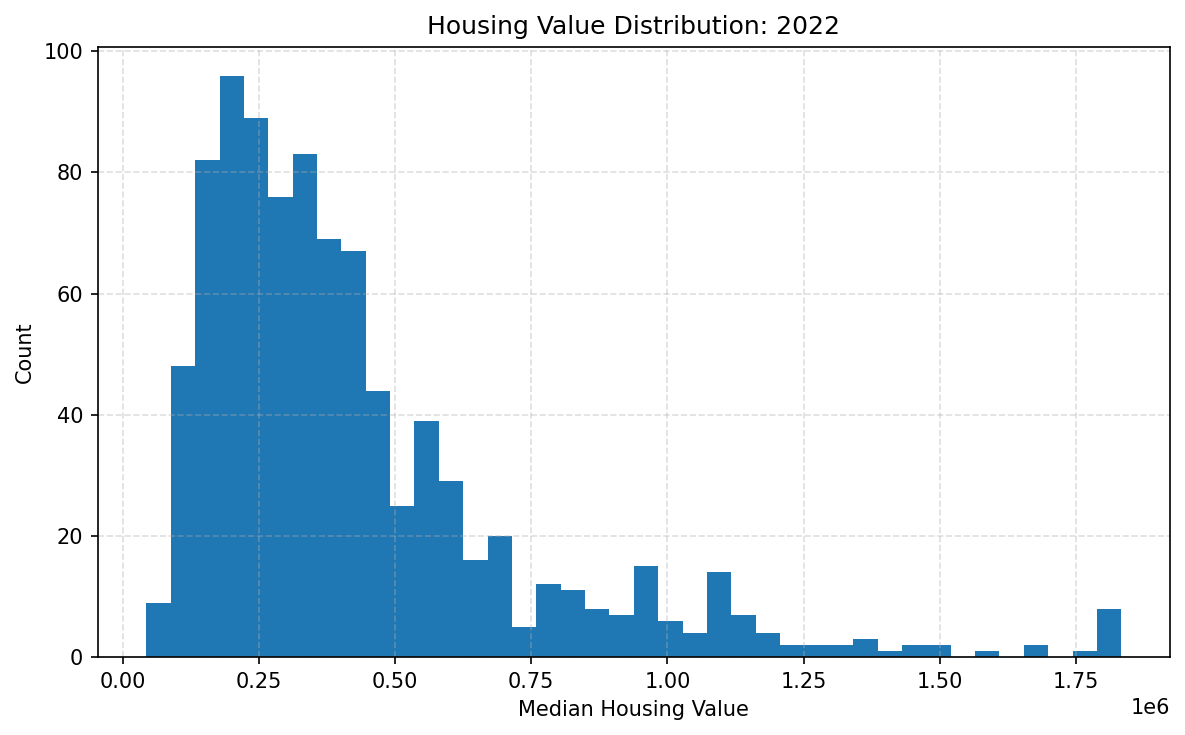

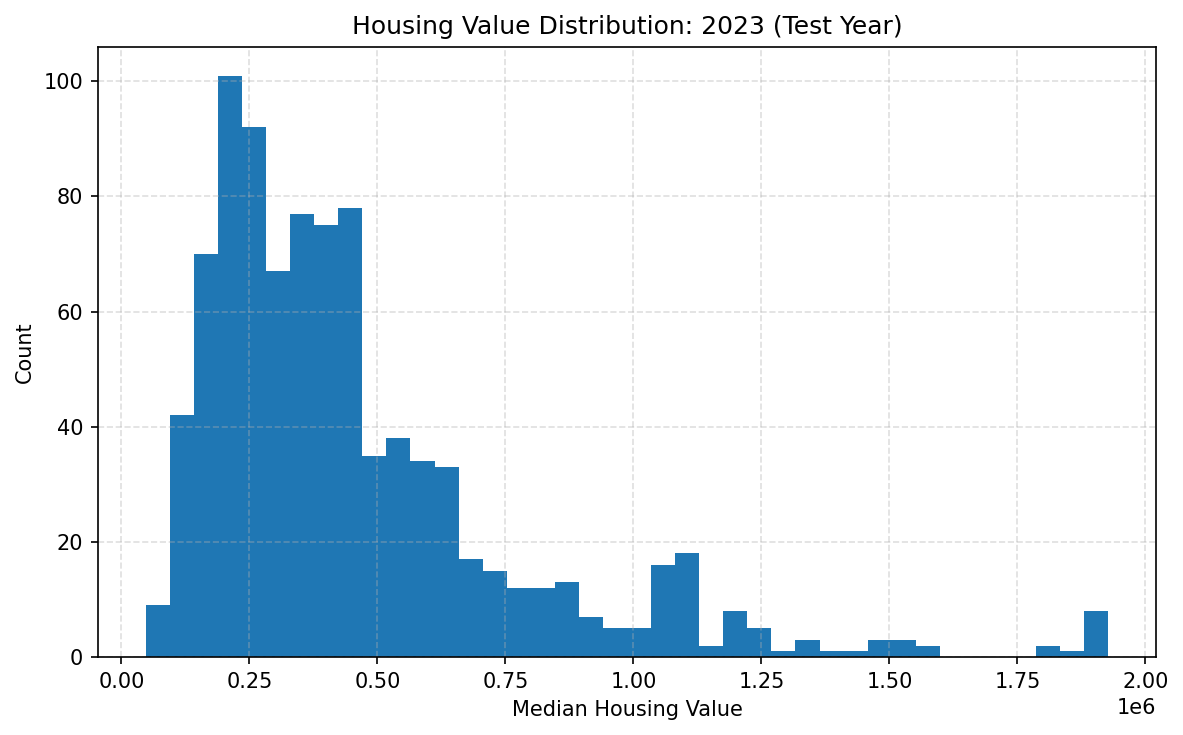

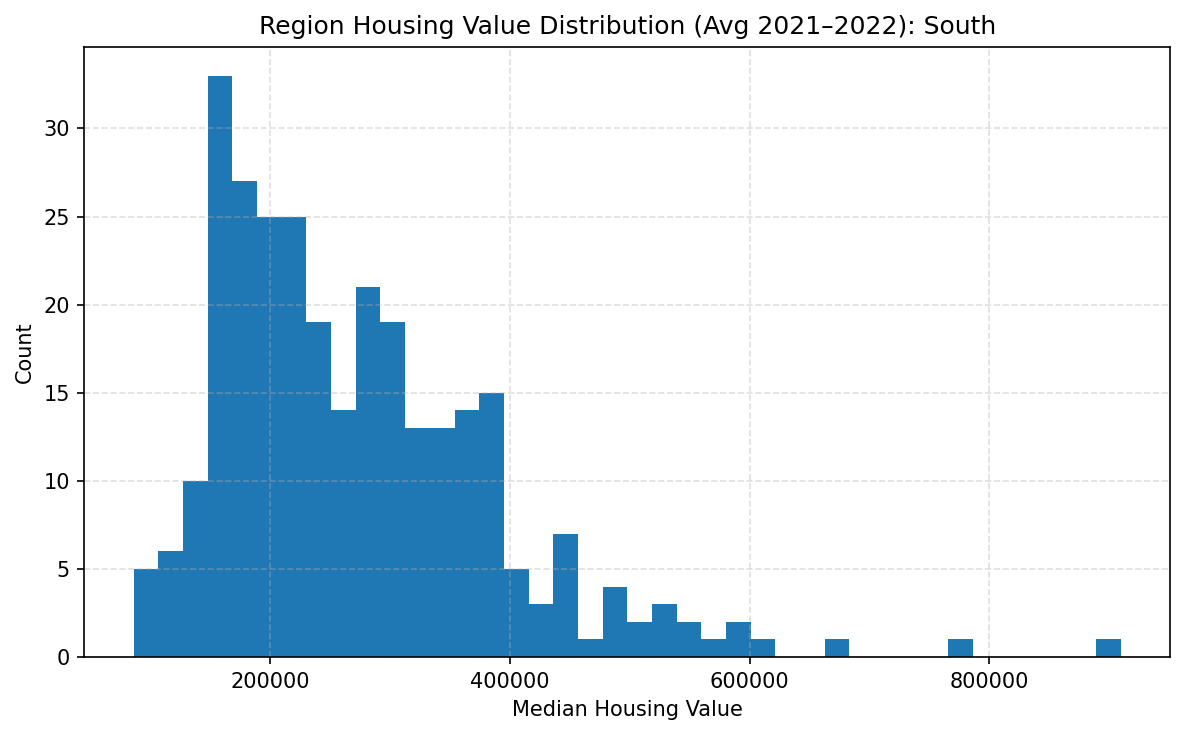

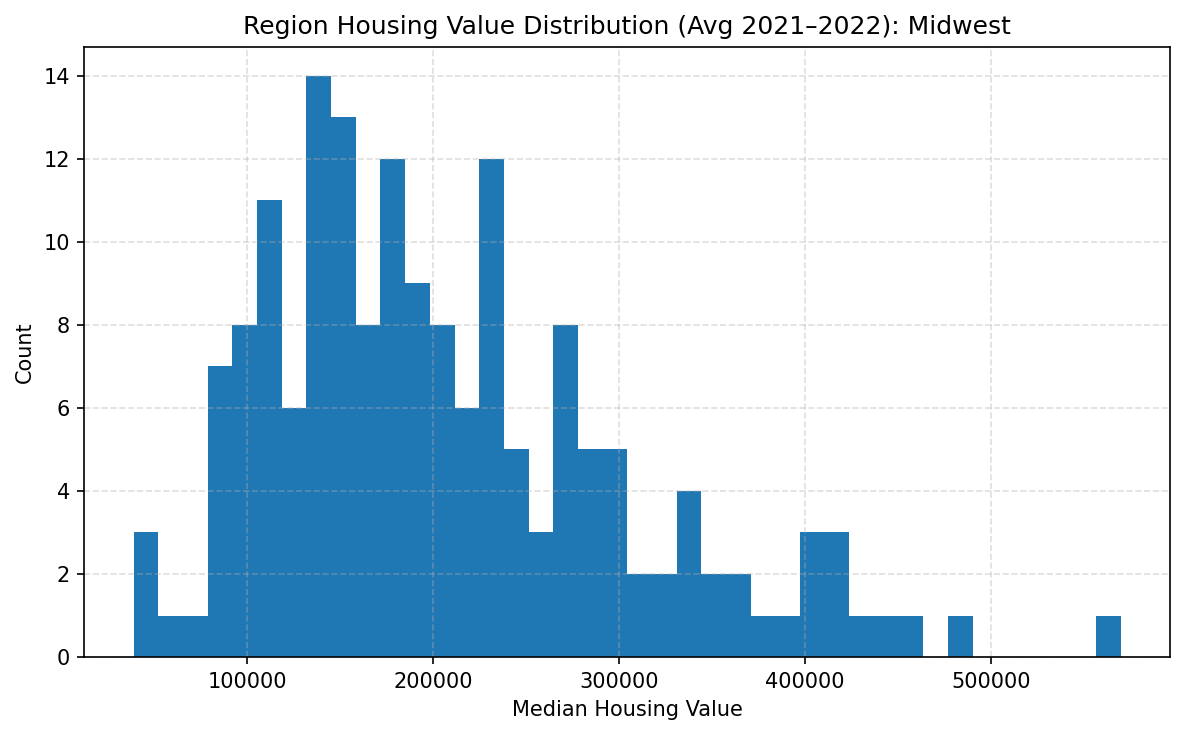

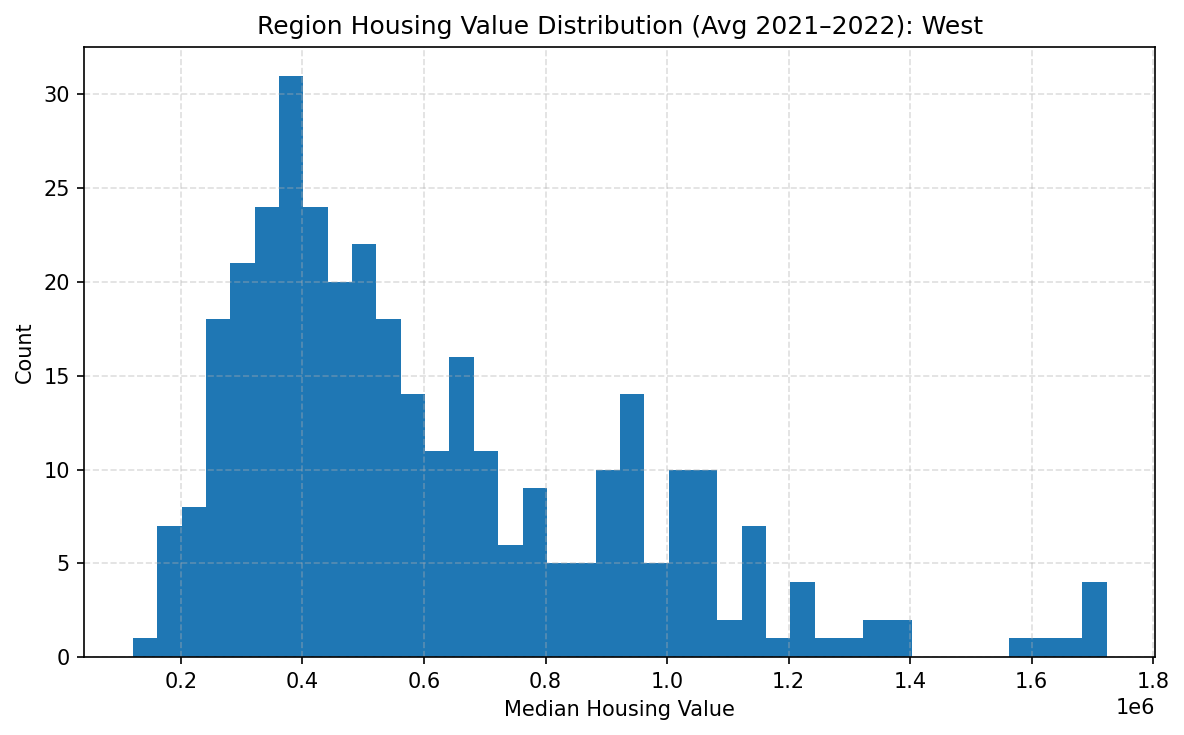

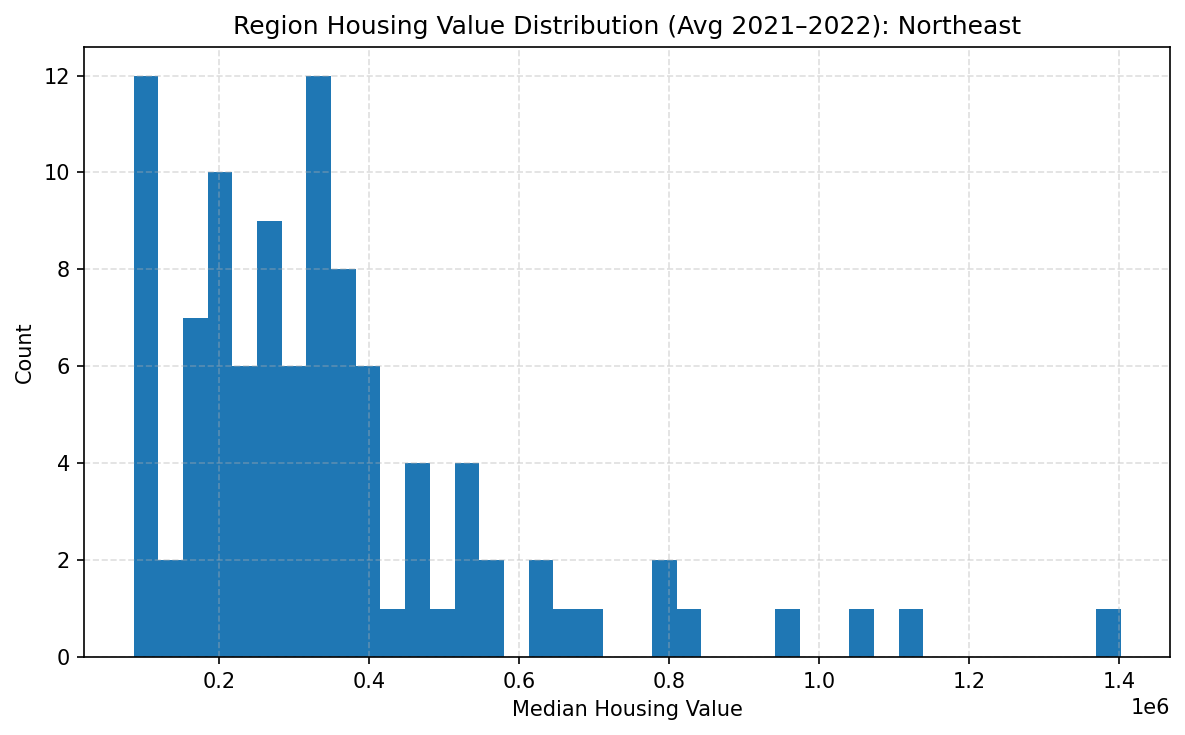

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. DISTRIBUTIONS BY YEAR
# -----------------------------

year_cols = [
    "Median_Housing_Value_2021",
    "Median_Housing_Value_2022",
    "Median_Housing_Value_2023"
]

for col in year_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(merged_df[col].dropna(), bins=40)   # default color per instructions

    year = col.split("_")[3]
    title = f"Housing Value Distribution: {year}"

    if year == "2023":
        title += " (Test Year)"

    plt.title(title)
    plt.xlabel("Median Housing Value")
    plt.ylabel("Count")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()


# -----------------------------
# 2. REGION-LEVEL DISTRIBUTIONS
# Using the average of 2021–2022
# -----------------------------

merged_df["avg_21_22"] = merged_df[["Median_Housing_Value_2021",
                      "Median_Housing_Value_2022"]].mean(axis=1)

regions = merged_df["region"].dropna().unique()

for region in regions:
    region_df = merged_df[merged_df["region"] == region]

    plt.figure(figsize=(8, 5))
    plt.hist(region_df["avg_21_22"].dropna(), bins=40)

    plt.title(f"Region Housing Value Distribution (Avg 2021–2022): {region}")
    plt.xlabel("Median Housing Value")
    plt.ylabel("Count")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
